Przeprowadź klasyfikację oszustw (na podstawie danych case1); stwórz 3 osobne klasyfikatory (albo 3 różne modele, albo ten sam model z różnymi hiperparametrami) wybierz najlepszy i uzasadnij wybór.

W skład rozwiązania powinno wchodzić:

przygotowanie danych (sprawdzenie braków, standaryzacja)
redukcja wymiarów
zbilansowanie częściowe próbki
wybór modelu

In [ ]:
import pandas as pd

creditcard_df = pd.read_csv("creditcard.csv")

creditcard_df.info()
creditcard_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239673 entries, 0 to 239672
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    239673 non-null  float64
 1   V1      239673 non-null  float64
 2   V2      239673 non-null  float64
 3   V3      239673 non-null  float64
 4   V4      239673 non-null  float64
 5   V5      239673 non-null  float64
 6   V6      239673 non-null  float64
 7   V7      239673 non-null  float64
 8   V8      239673 non-null  float64
 9   V9      239673 non-null  float64
 10  V10     239673 non-null  float64
 11  V11     239673 non-null  float64
 12  V12     239673 non-null  float64
 13  V13     239673 non-null  float64
 14  V14     239673 non-null  float64
 15  V15     239673 non-null  float64
 16  V16     239673 non-null  float64
 17  V17     239673 non-null  float64
 18  V18     239672 non-null  float64
 19  V19     239672 non-null  float64
 20  V20     239672 non-null  float64
 21  V21     23

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
creditcard_df = creditcard_df.dropna()
print("Po usunięciu braków:", creditcard_df.shape)

Po usunięciu braków: (239672, 31)


Standaryzacja danych

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df['Time'] = scaler.fit_transform(creditcard_df[['Time']])
creditcard_df['Amount'] = scaler.fit_transform(creditcard_df[['Amount']])

In [ ]:
X = creditcard_df.drop('Class', axis=1)
y = creditcard_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA().fit(X_train_scaled)

cumvar = np.cumsum(pca.explained_variance_ratio_)
n90 = np.searchsorted(cumvar, 0.90) + 1

print(f"Liczba składowych PCA potrzebna do wyjaśnienia 90% wariancji: {n90}")

Liczba składowych PCA potrzebna do wyjaśnienia 90% wariancji: 26


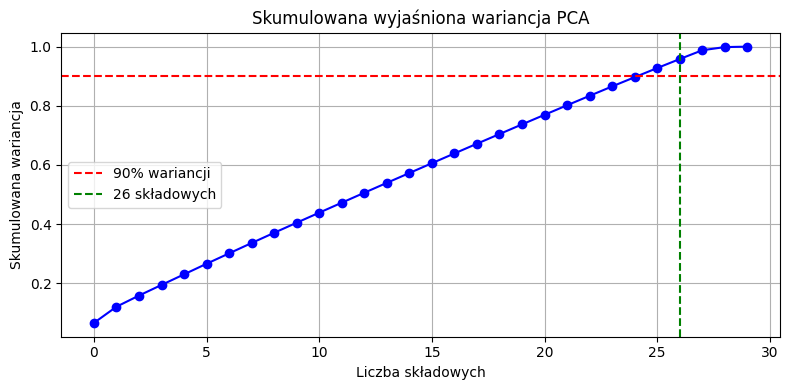

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(cumvar, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% wariancji')
plt.axvline(x=n90, color='green', linestyle='--', label=f'{n90} składowych')
plt.title("Skumulowana wyjaśniona wariancja PCA")
plt.xlabel("Liczba składowych")
plt.ylabel("Skumulowana wariancja")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pca_final = PCA(n_components=26, random_state=42)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(scaler.transform(X_test))

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.1, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Model z wagami klas
model_cs_lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_cs_lr.fit(X_train_resampled, y_train_resampled)

y_pred_cs_lr = model_cs_lr.predict(X_test_pca)
print("=== Cost-sensitive Logistic Regression ===")
print(classification_report(y_test, y_pred_cs_lr))

=== Cost-sensitive Logistic Regression ===
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     71771
         1.0       0.07      0.92      0.14       131

    accuracy                           0.98     71902
   macro avg       0.54      0.95      0.56     71902
weighted avg       1.00      0.98      0.99     71902



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_cs_lr)
tn, fp, fn, tp = cm.ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)
print(cm)

TN, FP, FN, TP: 70266 1505 10 121
[[70266  1505]
 [   10   121]]


Model cost-sensitive Logistic Regression wykrywa około 92% wszystkich oszustw, natomiast spośród transakcji oznaczonych jako oszustwo tylko 7% to faktyczne oszustwo. Precyzja jest bardzo niska, mimo wysokigo recall.



In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline z klasyczną regresją
smote = SMOTE(sampling_strategy=0.1, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
model_lr = LogisticRegression(max_iter=1000, random_state=42)

pipeline_lr = make_pipeline(smote, rus, model_lr)
pipeline_lr.fit(X_train_pca, y_train)

y_pred_pipe_lr = pipeline_lr.predict(X_test_pca)
print("=== Pipeline: SMOTE + RUS + Logistic Regression ===")
print(classification_report(y_test, y_pred_pipe_lr))

=== Pipeline: SMOTE + RUS + Logistic Regression ===
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     71771
         1.0       0.13      0.90      0.23       131

    accuracy                           0.99     71902
   macro avg       0.56      0.94      0.61     71902
weighted avg       1.00      0.99      0.99     71902



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_pipe_lr)
tn, fp, fn, tp = cm.ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)
print(cm)

TN, FP, FN, TP: 70982 789 13 118
[[70982   789]
 [   13   118]]


Model pipeline z SMOTE+RUS delikatnie poprawił trafność predykcji pozytywnych kosztem niewielkiego spadku recall.

In [ ]:
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline z XGBoost
smote = SMOTE(sampling_strategy=0.1, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipeline_xgb = make_pipeline(smote, rus, model_xgb)
pipeline_xgb.fit(X_train_pca, y_train)

y_pred_pipe_xgb = pipeline_xgb.predict(X_test_pca)
print("=== Pipeline: SMOTE + RUS + XGBoost ===")
print(classification_report(y_test, y_pred_pipe_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:31:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Pipeline: SMOTE + RUS + XGBoost ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71771
         1.0       0.56      0.90      0.69       131

    accuracy                           1.00     71902
   macro avg       0.78      0.95      0.85     71902
weighted avg       1.00      1.00      1.00     71902



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_pipe_xgb)
tn, fp, fn, tp = cm.ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)
print(cm)

TN, FP, FN, TP: 71679 92 13 118
[[71679    92]
 [   13   118]]


Model pipeline z XGBoost daje dużo lepsze wyniki od poprzednich. Precyzja wzrosła do 56%, przy czym recall pozostał na 90%.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1) Cost-sensitive LR (trained on resampled PCA data)
pipe_cs_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=26, random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# 2) Pipeline SMOTE+RUS+LR (resampling inside pipeline)
pipe_smote_lr = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=26, random_state=42)),
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('rus', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# 3) Pipeline SMOTE+RUS+XGB
pipe_smote_xgb = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=26, random_state=42)),
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('rus', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
    ('clf', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))
])

models = {
    "CS_LR": pipe_cs_lr,
    "SMOTE_RUS_LR": pipe_smote_lr,
    "SMOTE_RUS_XGB": pipe_smote_xgb
}

scoring = ['average_precision', 'recall', 'precision']

results = {}
for name, mdl in models.items():
    res = {}
    for score in scoring:
        scores = cross_val_score(mdl, X_train, y_train, cv=cv, scoring=score, n_jobs=-1)
        res[score] = (np.mean(scores), np.std(scores))
    results[name] = res

for name, res in results.items():
    print(name)
    for metric, (m, s) in res.items():
        print(f"  {metric}: {m:.4f} ± {s:.4f}")
    print()

CS_LR
  average_precision: 0.7125 ± 0.0587
  recall: 0.8955 ± 0.0337
  precision: 0.0599 ± 0.0033

SMOTE_RUS_LR
  average_precision: 0.7215 ± 0.0566
  recall: 0.8792 ± 0.0334
  precision: 0.1214 ± 0.0111

SMOTE_RUS_XGB
  average_precision: 0.8129 ± 0.0394
  recall: 0.8400 ± 0.0415
  precision: 0.5903 ± 0.0541



Najlepszym modelem w przeprowadzonych eksperymentach jest SMOTE_RUS_XGB, ponieważ osiągnął najwyższą wartość average_precision (0.8129), co świadczy o najlepszej zdolności separacji klas w warunkach silnej nierównowagi, jednocześnie utrzymując wysoki poziom wykrywalności oszustw (recall ≈ 0.84) przy znacząco wyższej precyzji (≈ 0.59) niż pozostałe testowane modele